In [1]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
import os

from pykern.pkcollections import PKDict
from pykern import pkdebug

# The rslaser library may not be installed, so a check is required.
try:
    import rslaser
except:
    # Developers should use 'pip install -e .' from the command line.
    # Users can install directly from GitHub --
    !{sys.executable} -m pip install git+https://github.com/radiasoft/rslaser.git
    import rslaser
from rslaser.pulse import pulse
from rslaser.utils import plot_fields, plot_tools, constants

# reset notebook style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [2]:
# specify the parameters in a PKDict dictionary object
_PHE_DEFAULT = const.h * const.c / 1e-6   # photon energy corresponding to lambda = 1 micron
_Z_WAIST_DEFAULT = 0
_Z_CENTER_DEFAULT = 0
_LASER_PULSE_SLICE_DEFAULTS = PKDict(
    sigrW=0.000186,
    propLen=15,
    pulseE=0.001,
    poltype=1,
    sampFact=5,
    numsig=3.,
    mx=0,
    my=0
)
_LASER_PULSE_DEFAULTS = PKDict(
        phE=_PHE_DEFAULT,
        nslice=3,
        chirp=0,
        w0=.1,
        a0=.01,
        dw0x=0.0,
        dw0y=0.0,
        z_waist=_Z_WAIST_DEFAULT,
        dzwx=0.0,
        dzwy=0.0,
        tau_fwhm=0.1 / const.c / math.sqrt(2.),
        z_center=_Z_CENTER_DEFAULT,
        x_shift = 0.,
        y_shift=0.,
        d_to_w=_Z_WAIST_DEFAULT - _Z_CENTER_DEFAULT,
        slice_params=_LASER_PULSE_SLICE_DEFAULTS,
)

In [3]:
# instantiate the laser pulse object
LP = pulse.LaserPulse(_LASER_PULSE_DEFAULTS)

In [4]:
# specify the desired plots
plot_1d_x_envelope = True
plot_1d_y_envelope = True
plot_1d_r_envelope = True
plot_2d_xy_envelope = True

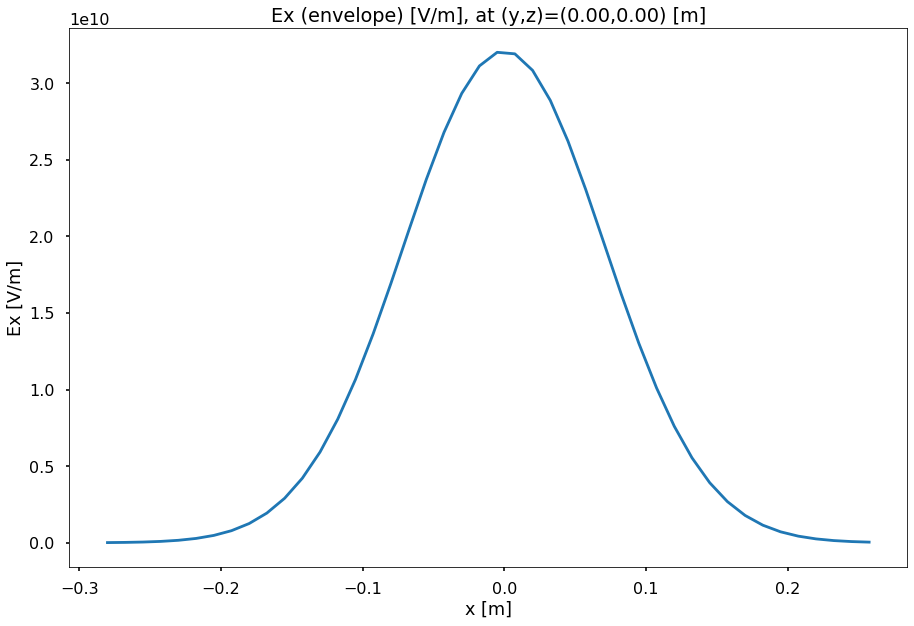

In [5]:
# plot a lineout of Ex along x
# we are assuming linear polarization along the x-axis

# Turn on print statements for a particular file, a specified module, or *all* rslaser modules
#pkdebug.init(control='gauss_hermite.py')
#pkdebug.init(control='rspulse')
#pkdebug.init(control='rslaser')

if plot_1d_x_envelope:
    _wZ = LP.envelope.w0 * math.sqrt(1+(LP.envelope.z_waist/LP.envelope.zR)**2)
    x_max = plot_tools.round_sig_fig(2.8*_wZ, 2)
    x_min = -x_max
    
#    print(' x_max = ', x_max)
#    print(' z_waist = ', LP.envelope.z_waist)

    # resolution
    x_res = 8
    del_x = LP.envelope.w0 / x_res
    num_pts = int((x_max - x_min) / del_x)
#    print('\n  num_pts = ', num_pts)

    x_vals = np.zeros(num_pts)
    for ind in range(num_pts):
        x_vals[ind] = x_min + ind*del_x
    
    y_val = 0.
#    z_val = LP.envelope.L_fwhm
    z_val = 0.

    with plt.style.context(('seaborn-poster')):
        fig = plt.figure()
        ax = fig.gca()
        plot_fields.plot_1d_x(x_vals, LP.envelope, ax, _y=y_val, _z=z_val)

    plt.tight_layout()

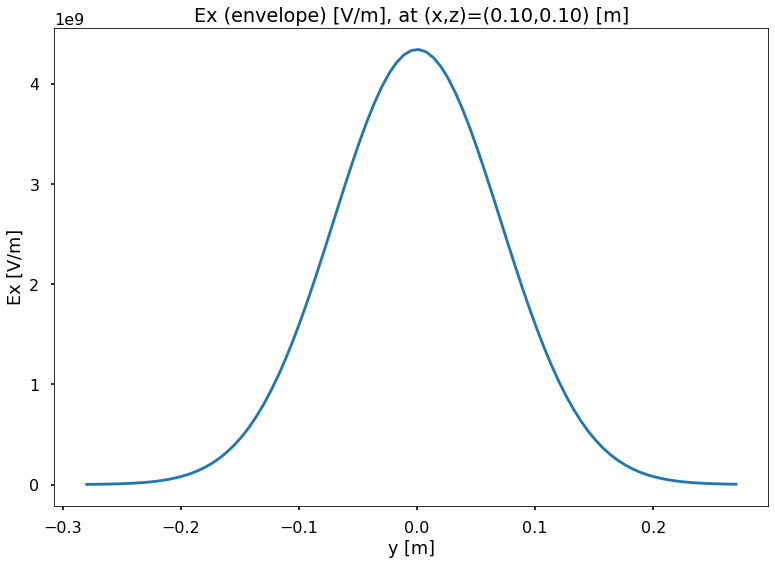

In [6]:
# plot a lineout of Ex along y
# we are assuming linear polarization along the x-axis

# Turn on print statements for a particular file, a specified module, or *all* rslaser modules
#pkdebug.init(control='gauss_hermite.py')
#pkdebug.init(control='rspulse')
#pkdebug.init(control='rslaser')

if plot_1d_y_envelope:
    _wZ = LP.envelope.w0 * math.sqrt(1+(LP.envelope.z_waist/LP.envelope.zR)**2)
    y_max = plot_tools.round_sig_fig(2.8*_wZ, 2)
    y_min = -y_max
    
#    print(' y_max = ', y_max)
#    print(' z_waist = ', LP.envelope.z_waist)

    # resolution
    y_res = 16
    del_y = LP.envelope.w0 / y_res
    num_pts = int((y_max - y_min) / del_y)
#    print('\n  num_pts = ', num_pts)

    y_vals = np.zeros(num_pts)
    for ind in range(num_pts):
        y_vals[ind] = y_min + ind*del_y
    
    x_val = 1.0*_wZ                    # evaluate at position shifted in x
    z_val = 1.0*LP.envelope.L_fwhm     # evaluate at longitudinally shifted position

    with plt.style.context(('seaborn-poster')):
        fig = plt.figure()
        ax = fig.gca()
        plot_fields.plot_1d_y(y_vals, LP.envelope, ax, _x=x_val, _z=z_val)

#    plt.tight_layout()

 r_max =  0.27999999999999997
 z_waist =  0

  num_pts =  22


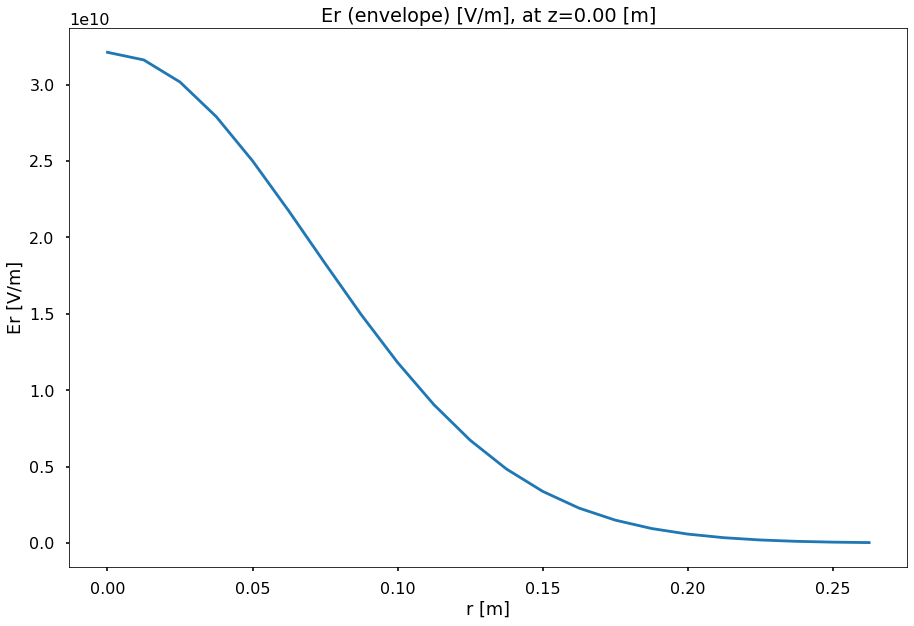

In [7]:
# plot a lineout of Er along r
# we are assuming circular polarization

# Turn on print statements for a particular file, a specified module, or *all* rslaser modules
#pkdebug.init(control='gauss_hermite.py')
#pkdebug.init(control='rspulse')
#pkdebug.init(control='rslaser')

if plot_1d_r_envelope:
    _wZ = LP.envelope.w0 * math.sqrt(1+(LP.envelope.z_waist/LP.envelope.zR)**2)
    r_max = plot_tools.round_sig_fig(2.8*_wZ, 2)
    r_min = 0.
    
    print(' r_max = ', r_max)
    print(' z_waist = ', LP.envelope.z_waist)

    # resolution
    r_res = 8
    del_r = LP.envelope.w0 / r_res
    num_pts = int((r_max - r_min) / del_r)
    print('\n  num_pts = ', num_pts)

    r_vals = np.zeros(num_pts)
    for ind in range(num_pts):
        r_vals[ind] = r_min + ind*del_r
    
#    z_val = LP.envelope.L_fwhm
    z_val = 0.

    with plt.style.context(('seaborn-poster')):
        fig = plt.figure()
        ax = fig.gca()
        plot_fields.plot_1d_r(r_vals, LP.envelope, ax, z_val)

    plt.tight_layout()

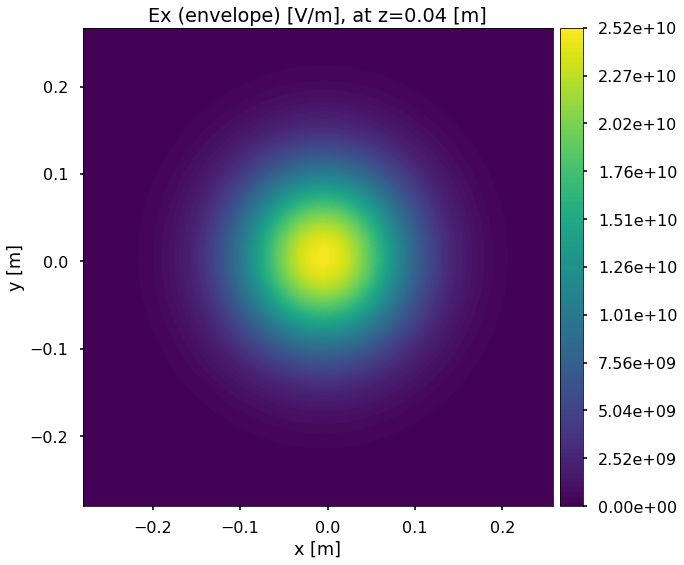

In [8]:
# generate a 2D contour plot of Ex in the transverse plane
# we are assuming linear polarization along the x-axis

# Turn on print statements for a particular file, a specified module, or *all* rslaser modules
#pkdebug.init(control='gauss_hermite.py')
#pkdebug.init(control='rspulse')
#pkdebug.init(control='rslaser')

if plot_2d_xy_envelope:
    _wZ = LP.envelope.w0 * math.sqrt(1+(LP.envelope.z_waist/LP.envelope.zR)**2)
    x_max = plot_tools.round_sig_fig(2.8*_wZ, 2)
    x_min = -x_max
    
    y_max = x_max
    y_min = -y_max

    # resolution
    x_res = 8
    del_x = LP.envelope.w0 / x_res
    num_pts = int((x_max - x_min) / del_x)
#    print('\n  num_pts = ', num_pts)
    
    del_y = (y_max - y_min) / num_pts

    x_vals = np.zeros(num_pts)
    for ind in range(num_pts):
        x_vals[ind] = x_min + ind*del_x

    y_vals = np.zeros(num_pts)
    for ind in range(num_pts):
        y_vals[ind] = y_min + ind*del_y
    
    z_val = LP.envelope.z_center + 0.5*LP.envelope.L_fwhm
    num_levels = 100

    with plt.style.context(('seaborn-poster')):
        fig = plt.figure()
        ax = fig.gca()
        plot_fields.plot_2d_xy(x_vals, y_vals, LP.envelope, ax, _z=z_val, _nlevels=num_levels)